# Manpower Planning

## Objective and Prerequisites

In various manufacturing and service industries, staffing challenges are widespread and involve challenging choices related to hiring, training, downsizing, and work scheduling. In this case, we aim to address a complex staffing issue by developing an optimal multi-period operational strategy that reduces both the overall number of layoffs and associated costs.


---
## Problem Description

Due to changes in the company's operational approach, there will be adjustments to its staffing requirements.

With the acquisition of new machinery, there will likely be a decreased demand for unskilled workers, while an increased demand for skilled and semi-skilled workers is anticipated. Additionally, a decline in sales projections, influenced by an anticipated economic downturn in the coming year, is expected to further reduce the overall labor requirements in all job categories.

The projected labor needs for the upcoming three-year period are as follows:

| <i></i> | Unskilled | Semi-skilled | Skilled |
| --- | --- | --- | --- |
| Current Strength | 2000 | 1500 | 1000 |
| Year 1 | 1000 | 1400 | 1000 |
| Year 2 | 500 | 2000 | 1500 |
| Year 3 | 0 | 2500 | 2000 |

The company needs to determine the following for each of the next three years:

- Recruitment
- Retraining
- Layoffs (redundancy)
- Part-time vs. full-time employees

It is worth noting that there is a natural attrition rate within the workforce each year. The attrition rate tends to be higher in the first year after an employee is hired and gradually decreases in the following years. The anticipated attrition rates are as follows:

| <i></i> | Unskilled (%)| Semi-skilled (%) | Skilled (%) |
| --- | --- | --- | --- |
| $< 1$ year of service | 25 | 20 | 10 |
| $\geq 1$ year of service | 10 | 5 | 5 |

All existing employees have completed a minimum of one year with the company.

### Recruitment

Every year, there is a restricted capacity to recruit external candidates for each job classification, as outlined below:

| Unskilled | Semi-skilled | Skilled |
| --- | --- | --- |
| 500 | 800 | 500 |

### Retraining

Annually, there is a potential to provide training for up to 200 unskilled workers, transforming them into semi-skilled workers. The training expenses incurred per worker amount to $\$400$.

Moreover, it is feasible to offer training for skilled workers to upgrade their skills, with the condition that the number of trainees does not surpass 25% of the existing skilled labor force. This training incurs a cost of $\$500$ per worker.

Lastly, the option of downgrading workers to a lower skill level exists. However, it should be noted that 50% of the downgraded workers will choose to leave the company, thus amplifying the natural attrition rate mentioned earlier.


### Layoffs

Each laid-off worker is entitled to a separation payment at the rate of $\$200$ per unskilled worker and $\$500$ per semi-skilled or skilled worker.

### Excess Employees

It is possible to have workers in excess of the actual number needed, up to 150 workers in total in any given year, but this will result in the following additional cost per excess employee per year.

| Unskilled | Semi-skilled | Skilled |
| --- | --- | --- |
| $\$1500$ | $\$2000$ | $\$3000$ |

### Part-time Workers

Part-time work can be allocated to a maximum of 50 employees for each skill level. The associated cost for each employee per year is as follows:

| Unskilled | Semi-skilled | Skilled |
| --- | --- | --- |
| $\$500$ | $\$400$ | $\$400$ |

**Note:** A part-time employee is half as productive as a full-time employee.

If the company’s objective is to minimize layoffs, what plan should they adopt in order to do this?

If their objective is to minimize costs, how much could they further reduce costs?



---
## Model Formulation

### Sets and Indices

$t \in \text{Years}=\{1,2,3\}$: Set of years.

$s \in \text{Skills}=\{s_1: \text{unskilled},s_2: \text{semi_skilled},s_3: \text{skilled}\}$: Set of skills.

### Parameters

$\text{rookie_attrition} \in [0,1] $: Percentage of workers who leave within the first year of service.

$\text{veteran_attrition} \in [0,1]$: Percentage of workers who leave after the first year of service.

$\text{demoted_attrition} \in [0,1]$: Percentage of workers who leave the company after a demotion.

$\text{parttime_cap} \in [0,1]$: Productivity of part-time workers with respect to full-time workers.

$\text{max_train_unskilled} \in \mathbb{N}$: Maximum number of unskilled workers that can be trained on any given year.

$\text{max_train_semiskilled} \in [0,1]$: Maximum proportion of semi-skilled workers (w.r.t. skilled ones) that can be trained on any given year.

$\text{max_parttime} \in \mathbb{N}$: Maximum number of part-time workers of each skill at any given year.

$\text{max_overmanning} \in \mathbb{N}$: Maximum number of overmanned workers at any given year.

$\text{max_hiring}_s \in \mathbb{N}$: Maximum number of workers of skill $s$ that can be hired any given year.

$\text{training_cost}_s \in \mathbb{R}^+$: Cost for training a worker of skill $s$ to the next level.

$\text{layoff_cost}_s \in \mathbb{R}^+$: Cost for laying off a worker of skill $s$.

$\text{parttime_cost}_s \in \mathbb{R}^+$: Cost for assigning a worker of skill $s$ to part-time work.

$\text{overmanning_cost}_s \in \mathbb{R}^+$: Yearly cost for having excess manpower of skill $s$.

$\text{curr_workforce}_s \in \mathbb{N}$: Current manpower of skill $s$ at the beginning of the planning horizon.

$\text{demand}_{t,s} \in \mathbb{N}$: Required manpower of skill $s$ in year $t$.


### Decision Variables

$\text{hire}_{t,s} \in [0,\text{max_hiring}_s] \subset \mathbb{R}^+$: Number of workers of skill $s$ to hire in year $t$.

$\text{part_time}_{t,s} \in [0,\text{max_parttime}] \subset \mathbb{R}^+$: Number of part-time workers of skill $s$ working in year $t$.

$\text{workforce}_{t,s} \in \mathbb{R}^+$: Number of workers of skill $s$ that are available in year $t$.

$\text{layoff}_{t,s} \in \mathbb{R}^+$: Number of workers of skill $s$ that are laid off in year $t$.

$\text{excess}_{t,s} \in \mathbb{R}^+$: Number of workers of skill $s$ that are overmanned in year $t$.

$\text{train}_{t,s,s'} \in \mathbb{R}^+$: Number of workers of skill $s$ to retrain to skill $s'$ in year $t$.

### Objective Function

- **Layoffs:** Minimize the total layoffs during the planning horizon.

\begin{equation}
\text{Minimize} \quad Z = \sum_{t \in \text{Years}}\sum_{s \in \text{Skills}}{\text{layoff}_{t,s}}
\end{equation}

- **Cost:** Minimize the total cost (in USD) incurred by training, overmanning, part-time workers, and layoffs in the planning horizon.

\begin{equation}
\text{Minimize} \quad W = \sum_{t \in \text{Years}}{\{\text{training_cost}_{s_1}*\text{train}_{t,s1,s2} + \text{training_cost}_{s_2}*\text{train}_{t,s2,s3}\}}
\end{equation}

\begin{equation}
+ \sum_{t \in \text{Years}}\sum_{s \in \text{Skills}}{\{\text{parttime_cost}*\text{part_time}_{t,s} + \text{layoff_cost}_s*\text{layoff}_{t,s} + \text{overmanning_cost}_s*\text{excess}_{t,s}\}}
\end{equation}

### Constraints

- **Initial Balance:** Workforce $s$ available in year $t=1$ is equal to the workforce of the previous year, recent hires, promoted and demoted workers (after accounting for attrition), minus layoffs and transferred workers.

\begin{equation}
\text{workforce}_{1,s} = (1-\text{veteran_attrition}_s)*\text{curr_workforce} + (1-\text{rookie_attrition}_s)*\text{hire}_{1,s} 
\end{equation}

\begin{equation}
+ \sum_{s' \in \text{Skills} | s' < s}{\{(1-\text{veteran_attrition})*\text{train}_{1,s',s} - \text{train}_{1,s,s'}\}} 
\end{equation}

\begin{equation}
+ \sum_{s' \in \text{Skills} | s' > s}{\{(1-\text{demoted_attrition})*\text{train}_{1,s',s} - \text{train}_{1,s,s'}\}} - \text{layoff}_{1,s} \qquad \forall s \in \text{Skills}
\end{equation}


- **Balance:** Workforce $s$ available in year $t > 1$ is equal to the workforce of the previous year, recent hires, promoted and demoted workers (after accounting for attrition), minus layoffs and transferred workers.

\begin{equation}
\text{workforce}_{t,s} = (1-\text{veteran_attrition}_s)*\text{workforce}_{t-1,s} + (1-\text{rookie_attrition}_s)*\text{hire}_{t,s} 
\end{equation}

\begin{equation}
+ \sum_{s' \in \text{Skills} | s' < s}{\{(1-\text{veteran_attrition})*\text{train}_{t,s',s} - \text{train}_{t,s,s'}\}}
\end{equation}

\begin{equation}
+ \sum_{s' \in \text{Skills} | s' > s}{\{(1-\text{demotion_attrition})*\text{train}_{t,s',s} - \text{train}_{t,s,s'}\}} - \text{layoff}_{t,s} \quad \forall (t > 1,s) \in \text{Years} \times \text{Skills}
\end{equation}

- **Unskilled Training:** Unskilled workers trained in year $t$ cannot exceed the maximum allowance. Unskilled workers cannot be immediately transformed into skilled workers.

\begin{equation}
\text{train}_{t,s_1,s_2} \leq 200 \quad \forall t \in \text{Years}
\end{equation}

\begin{equation}
\text{train}_{t,s_1,s_3} = 0 \quad \forall t \in \text{Years}
\end{equation}

- **Semi-skilled Training:** Semi-skilled workers trained in year $t$ cannot exceed the maximum allowance.

\begin{equation}
\text{train}_{t,s_2,s_3} \leq 0.25*\text{available}_{t,s_3} \quad \forall t \in \text{Years}
\end{equation}

- **Overmanning:** Excess workers in year $t$ cannot exceed the maximum allowance.

\begin{equation}
\sum_{s \in \text{Skills}}{\text{excess}_{t,s}} \leq \text{max_overmanning} \quad \forall t \in \text{Years}
\end{equation}

- **Demand:** Workforce $s$ available in year $t$ equals the required number of workers plus the excess workers and the part-time workers.

\begin{equation}
\text{available}_{t,s} = \text{demand}_{t,s} + \text{excess}_{t,s} + \text{parttime_cap}*\text{part_time}_{t,s} \quad \forall (t,s) \in \text{Years} \times \text{Skills}
\end{equation}

---
## Python Implementation

We import the Gurobi Python Module and other Python libraries.

In [1]:
import numpy as np
import pandas as pd

import gurobipy as gp
from gurobipy import GRB

# tested with Python 3.7.0 & Gurobi 9.0

## Input Data
We define all the input data of the model.

In [2]:
# Parameters

years = [1, 2, 3]
skills = ['s1', 's2', 's3']

curr_workforce = {'s1': 2000, 's2': 1500, 's3': 1000}
demand = {
    (1, 's1'): 1000,
    (1, 's2'): 1400,
    (1, 's3'): 1000,
    (2, 's1'): 500,
    (2, 's2'): 2000,
    (2, 's3'): 1500,
    (3, 's1'): 0,
    (3, 's2'): 2500,
    (3, 's3'): 2000
}
rookie_attrition = {'s1': 0.25, 's2': 0.20, 's3': 0.10}
veteran_attrition = {'s1': 0.10, 's2': 0.05, 's3': 0.05}
demoted_attrition = 0.50
max_hiring = {
    (1, 's1'): 500,
    (1, 's2'): 800,
    (1, 's3'): 500,
    (2, 's1'): 500,
    (2, 's2'): 800,
    (2, 's3'): 500,
    (3, 's1'): 500,
    (3, 's2'): 800,
    (3, 's3'): 500
}
max_overmanning = 150
max_parttime = 50
parttime_cap = 0.50
max_train_unskilled = 200
max_train_semiskilled = 0.25

training_cost = {'s1': 400, 's2': 500}
layoff_cost = {'s1': 200, 's2': 500, 's3': 500}
parttime_cost = {'s1': 500, 's2': 400, 's3': 400}
overmanning_cost = {'s1': 1500, 's2': 2000, 's3': 3000}

## Model Deployment
We develop a model and define the variables for each of the three skill levels and every year. These variables represent the number of workers recruited, transferred to part-time work, available as workers, redundant, or overmanned. Additionally, for each combination of skill levels and year, we introduce variables for the number of workers who undergo retraining to move to a higher or lower skill level. It is important to note that there are limitations on the number of individuals who are part-time and available for recruitment.

In [3]:
manpower = gp.Model('Manpower planning')

hire = manpower.addVars(years, skills, ub=max_hiring,  vtype=GRB.INTEGER,name="Hire")
part_time = manpower.addVars(years, skills, ub=max_parttime, vtype=GRB.INTEGER,name="Part_time")
workforce = manpower.addVars(years, skills, vtype=GRB.INTEGER, name="Available")
layoff = manpower.addVars(years, skills,  vtype=GRB.INTEGER,name="Layoff")
excess = manpower.addVars(years, skills, vtype=GRB.INTEGER, name="Overmanned")
train = manpower.addVars(years, skills, skills, vtype=GRB.INTEGER, name="Train")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-05


Subsequently, we impose the constraints. The balance constraints guarantee that, for each skill level and each year, the sum of workers currently required (LaborForce), workers who are laid off, and workers who are retrained to the same skill level (minus those retrained to a different skill level) equals the LaborForce from the previous year (or the CurrentStrength in the initial year), along with the number of recruited individuals. Additionally, the constraint considers the annual attrition rate, accounting for the number of people leaving the company. This constraint effectively represents the fluctuation in the total employed workforce.

In [4]:
#1.1 & 1.2 Balance

Balance = manpower.addConstrs(
    (workforce[year, level] == (1-veteran_attrition[level])*(curr_workforce[level] if year == 1 else workforce[year-1, level])
    + (1-rookie_attrition[level])*hire[year, level] + gp.quicksum((1- veteran_attrition[level])* train[year, level2, level]
                                                        -train[year, level, level2] for level2 in skills if level2 < level)
    + gp.quicksum((1- demoted_attrition)* train[year, level2, level] -train[year, level, level2] for level2 in skills if level2 > level)
    - layoff[year, level] for year in years for level in skills), "Balance")

The Unskilled training constraints stipulate that in each year, a maximum of 200 workers can undergo retraining from the Unskilled level to the Semi-skilled level, as there are capacity limitations. Furthermore, it is not possible for any workers to be trained directly from the Unskilled level to the Skilled level within a single year.

In [5]:
#2.1 & 2.2  Unskilled training
UnskilledTrain1 = manpower.addConstrs((train[year, 's1', 's2'] <= max_train_unskilled for year in years), "Unskilled_training1")
UnskilledTrain2 = manpower.addConstrs((train[year, 's1', 's3'] == 0 for year in years), "Unskilled_training2")

The Semi-skilled training constraint specifies that the retraining of Semi-skilled workers to Skilled workers is restricted to a maximum of 25% of the current Skilled labor force, considering the existing capacity limitations.

In [6]:
#3. Semi-skilled training

SemiskilledTrain = manpower.addConstrs((train[year,'s2', 's3'] <= max_train_semiskilled * workforce[year,'s3'] for year in years), "Semiskilled_training")

The overmanning constraints ensure that the total overmanning over all skill levels in one year is no more than 150.

In [7]:
#4. Overmanning
Overmanning = manpower.addConstrs((excess.sum(year, '*') <= max_overmanning for year in years), "Overmanning")

The demand constraints guarantee that the total number of workers for each skill level and year corresponds to the required number of workers, in addition to the count of Overmanned workers and those employed in part-time positions.

In [8]:
#5. Demand
Demand = manpower.addConstrs((workforce[year, level] ==
     demand[year,level] + excess[year, level] + parttime_cap * part_time[year, level]
                     for year in years for level in skills), "Requirements")

The primary objective is to minimize the overall number of workers who are laid off. This can be formulated as follows:

## Objective 1 : Minimizing Layoffs

In [9]:
obj1 = layoff.sum()
manpower.setObjective(obj1, GRB.MINIMIZE)

Next we start the optimization with the objective function of minimizing layoffs, and Gurobi finds the optimal solution.

In [10]:
manpower.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 72 columns and 117 nonzeros
Model fingerprint: 0x6b190479
Variable types: 0 continuous, 72 integer (0 binary)
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [5e+01, 8e+02]
  RHS range        [2e+02, 3e+03]
Presolve removed 15 rows and 22 columns
Presolve time: 0.02s
Presolved: 15 rows, 50 columns, 95 nonzeros
Variable types: 0 continuous, 50 integer (0 binary)

Root relaxation: objective 8.417969e+02, 17 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  841.79688    0   11          -  841.79688      -     - 

## Analysis

The minimum number of layoffs is determined to be 843. The optimal policies required to attain this minimum number of layoffs are outlined below.

### Hiring Plan

This plan establishes the number of new workers to be hired for each year of the planning horizon (rows) and for each skill level (columns). For instance, in year 2, the plan entails hiring approximately 649.3 workers with Semi-skilled expertise.

In [11]:
rows = years.copy()
columns = skills.copy()
hire_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level in hire.keys():
    if (abs(hire[year, level].x) > 1e-6):
        hire_plan.loc[year, level] = np.round(hire[year, level].x, 1)
hire_plan

,s1,s2,s3
1,0.0,0.0,2.0
2,0.0,654.0,495.0
3,0.0,690.0,500.0


### Training and Demotions Plan
This plan specifies the number of workers to be promoted through training or demoted at each year of the planning horizon. For instance, in year 1, the plan involves demoting approximately 168.4 workers with skilled (s3) expertise to the semi-skilled (s2) level.

In [12]:
rows = years.copy()
columns = ['{0} to {1}'.format(level1, level2) for level1 in skills for level2 in skills if level1 != level2]
train_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level1, level2 in train.keys():
    col = '{0} to {1}'.format(level1, level2)
    if (abs(train[year, level1, level2].x) > 1e-6):
        train_plan.loc[year, col] = np.round(train[year, level1, level2].x, 1)
train_plan

,s1 to s2,s1 to s3,s2 to s1,s2 to s3,s3 to s1,s3 to s2
1,200.0,0.0,0.0,256.0,0.0,170.0
2,200.0,0.0,0.0,85.0,0.0,0.0
3,200.0,0.0,1.0,140.0,0.0,0.0


In [13]:
cost_of_training = sum(train_plan['s1 to s2']*400) + sum(train_plan['s2 to s3']*500)

In [14]:
cost_of_training

480500.0

### Layoffs Plan

This plan establishes the number of workers to be laid off for each skill level and each year of the planning horizon. For instance, in year 3, the plan involves laying off approximately 232.5 workers with Unskilled expertise.

In [15]:
rows = years.copy()
columns = skills.copy()
layoff_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level in layoff.keys():
    if (abs(layoff[year, level].x) > 1e-6):
        layoff_plan.loc[year, level] = np.round(layoff[year, level].x, 1)
layoff_plan

,s1,s2,s3
1,450.0,0.0,0.0
2,160.0,0.0,0.0
3,233.0,0.0,0.0


### Part-time Plan

This plan outlines the number of part-time workers for each skill level during each year of the planning horizon. For example, in year 1, there are 50 part-time workers with skilled expertise.

In [16]:
rows = years.copy()
columns = skills.copy()
parttime_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level in part_time.keys():
    if (abs(part_time[year, level].x) > 1e-6):
        parttime_plan.loc[year, level] = np.round(part_time[year, level].x, 1)
parttime_plan

,s1,s2,s3
1,38.0,50.0,50.0
2,50.0,0.0,0.0
3,50.0,2.0,16.0


### Overmanning Plan

This plan specifies the number of excess workers for each skill level during each year of the planning horizon. For instance, in year 3, there are 150 excess workers with Unskilled expertise.

In [17]:
rows = years.copy()
columns = skills.copy()
excess_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level in excess.keys():
    if (abs(excess[year, level].x) > 1e-6):
        excess_plan.loc[year, level] = np.round(excess[year, level].x, 1)
excess_plan

,s1,s2,s3
1,131.0,19.0,0.0
2,150.0,0.0,0.0
3,150.0,0.0,0.0


In [18]:
layoff_total_cost = sum(layoff_cost[level] * layoff[year, level].x for year, level in layoff.keys())

In [19]:
layoff_total_cost

168600.0

In [20]:
parttime_total_cost = sum(parttime_cost[level] * part_time[year, level].x for year, level in part_time.keys())

In [21]:
parttime_total_cost

116200.0

In [22]:
overmanning_total_cost = sum(overmanning_cost[level] * excess[year, level].x for year, level in excess.keys())

In [23]:
overmanning_total_cost

684500.0

In [24]:
training_cost = {'s1': 400, 's2': 500, 's3':0}

In [25]:
total_cost = layoff_total_cost + cost_of_training + parttime_total_cost + overmanning_total_cost

In [26]:
total_cost

1449800.0

In [27]:
manpower.write("manpower-planning-output.sol")

## Objective 2 : Minimize Costs

In [28]:
#The secondary alternative objective is to minimize the total cost associated with all employed workers, including the expenses incurred for retraining.

obj2 = gp.quicksum((training_cost[level]*train[year, level, skills[skills.index(level)+1]] if level < 's3' else 0)
                + layoff_cost[level]*layoff[year, level]
                + parttime_cost[level]*part_time[year, level]
                + overmanning_cost[level] * excess[year, level] for year in years for level in skills)

manpower.setObjective(obj2, GRB.MINIMIZE)
#Next we start the optimization with the objective function of minimizing layoffs, and Gurobi finds the optimal solution.

In [29]:
manpower.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 72 columns and 117 nonzeros
Model fingerprint: 0xc365b110
Variable types: 0 continuous, 72 integer (0 binary)
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [2e+02, 3e+03]
  Bounds range     [5e+01, 8e+02]
  RHS range        [2e+02, 3e+03]

Loaded MIP start from previous solve with objective 1.4498e+06

Presolve removed 16 rows and 25 columns
Presolve time: 0.00s
Presolved: 14 rows, 47 columns, 89 nonzeros
Found heuristic solution: objective 1214800.0000
Variable types: 0 continuous, 47 integer (0 binary)
Found heuristic solution: objective 1214000.0000

Root relaxation: objective 4.986773e+05, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds 

## Analysis

The minimum cost is 508700. The optimal policies required to attain this minimum number of layoffs are outlined below.

### Hiring Plan

This plan establishes the number of new workers to be hired for each year of the planning horizon (rows) and for each skill level (columns). For instance, in year 2, the plan entails hiring approximately 649.3 workers with Semi-skilled expertise.

In [30]:
rows = years.copy()
columns = skills.copy()
hire_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level in hire.keys():
    if (abs(hire[year, level].x) > 1e-6):
        hire_plan.loc[year, level] = np.round(hire[year, level].x, 1)
hire_plan

,s1,s2,s3
1,0.0,0.0,60.0
2,0.0,798.0,495.0
3,0.0,799.0,500.0


### Training and Demotions Plan
This plan specifies the number of workers to be promoted through training or demoted at each year of the planning horizon. For instance, in year 1, the plan involves demoting approximately 168.4 workers with skilled (s3) expertise to the semi-skilled (s2) level.

In [31]:
rows = years.copy()
columns = ['{0} to {1}'.format(level1, level2) for level1 in skills for level2 in skills if level1 != level2]
train_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level1, level2 in train.keys():
    col = '{0} to {1}'.format(level1, level2)
    if (abs(train[year, level1, level2].x) > 1e-6):
        train_plan.loc[year, col] = np.round(train[year, level1, level2].x, 1)
train_plan

,s1 to s2,s1 to s3,s2 to s1,s2 to s3,s3 to s1,s3 to s2
1,0.0,0.0,25.0,0.0,3.0,0.0
2,148.0,0.0,0.0,109.0,0.0,0.0
3,104.0,0.0,2.0,140.0,0.0,8.0


In [32]:
cost_of_training = sum(train_plan['s1 to s2']*400) + sum(train_plan['s2 to s3']*500)

In [33]:
cost_of_training

225300.0

### Layoffs Plan

This plan establishes the number of workers to be laid off for each skill level and each year of the planning horizon. For instance, in year 3, the plan involves laying off approximately 232.5 workers with Unskilled expertise.

In [34]:
rows = years.copy()
columns = skills.copy()
layoff_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level in layoff.keys():
    if (abs(layoff[year, level].x) > 1e-6):
        layoff_plan.loc[year, level] = np.round(layoff[year, level].x, 1)
layoff_plan

,s1,s2,s3
1,814.0,0.0,0.0
2,252.0,0.0,0.0
3,347.0,0.0,0.0


### Part-time Plan

This plan outlines the number of part-time workers for each skill level during each year of the planning horizon. For example, in year 1, there are 50 part-time workers with skilled expertise.

In [35]:
rows = years.copy()
columns = skills.copy()
parttime_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level in part_time.keys():
    if (abs(part_time[year, level].x) > 1e-6):
        parttime_plan.loc[year, level] = np.round(part_time[year, level].x, 1)
parttime_plan

,s1,s2,s3
1,0.0,0.0,2.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0


### Overmanning Plan

This plan specifies the number of excess workers for each skill level during each year of the planning horizon. For instance, in year 3, there are 150 excess workers with Unskilled expertise.

In [36]:
rows = years.copy()
columns = skills.copy()
excess_plan = pd.DataFrame(columns=columns, index=rows, data=0.0)

for year, level in excess.keys():
    if (abs(excess[year, level].x) > 1e-6):
        excess_plan.loc[year, level] = np.round(excess[year, level].x, 1)
excess_plan

,s1,s2,s3
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0


In [38]:
layoff_total_cost = sum(layoff_cost[level] * layoff[year, level].x for year, level in layoff.keys())

In [39]:
parttime_total_cost = sum(parttime_cost[level] * part_time[year, level].x for year, level in part_time.keys())


In [40]:
overmanning_total_cost = sum(overmanning_cost[level] * excess[year, level].x for year, level in excess.keys())

In [41]:
total_cost = layoff_total_cost + cost_of_training + parttime_total_cost + overmanning_total_cost


In [42]:
total_cost

508700.0

In [43]:
manpower.write("manpower-planning-output.sol")

By prioritizing cost minimization, implementing policies that would incur a total cost of $\$508,700$ over the three-year period could result in 1,413 layoffs. However, alternative optimal solutions can be explored to reduce layoffs without significantly increasing costs. 

If cost minimization takes precedence over layoffs, it is possible to save $\$939,100$ but at the expense of an additional 570 layoffs. Therefore, the cost of preserving each job, when minimizing layoffs, can be estimated as $\$1,647.5$.

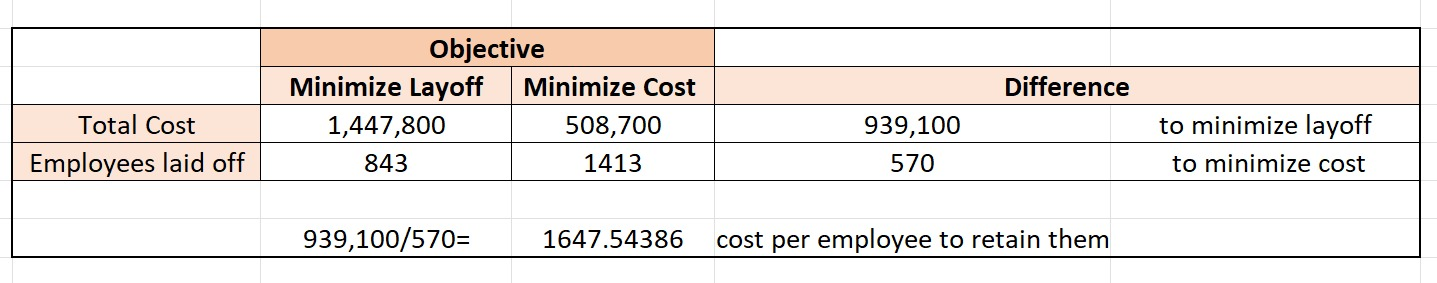

## References
​
H. Paul Williams, Model Building in Mathematical Programming, fifth edition.
​
Copyright &copy; 2020 Gurobi Optimization, LLC